# Train/test PathCore in Colab.

1. set python==3.8  
2. clone patchcore  
3. install requirements  
4. train models  
5. evaluate models



## Prepare environment

#### Create virtual environment  

**Note:** I did this to reduce time to install new packages.  
If you want to leave this out, just delete the prefix `!source {patchcoreenv}/bin/activate;` before shell commands.

In [ ]:
## Uncomment the first time
# !pip3 install virtualenv

In [ ]:
## Uncomment the first time
# !virtualenv patchcoreenv

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
# Modify to the location of the environment.
patchcoreenv = '/content/drive/Othercomputers/My\ laptop/patchcore-medical/notebooks/patchcoreenv'

In [1]:
!source {patchcoreenv}/bin/activate; pip3 list

/bin/bash: line 1: {patchcoreenv}/bin/activate: No such file or directory
Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcal

#### Get python 3.8

In [4]:
!source {patchcoreenv}/bin/activate; python --version

Python 3.10.12


In [5]:
!source {patchcoreenv}/bin/activate; apt-get update -y

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,064 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [670 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,401 kB]
Get:

In [6]:
!source {patchcoreenv}/bin/activate; apt-get install python3.8 python3.8-distutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3.8-lib2to3 python3.8-minimal
Suggested packages:
  python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3.8 python3.8-distutils
  python3.8-lib2to3 python3.8-minimal
0 upgraded, 8 newly installed, 0 to remove and 34 not upgraded.
Need to get 5,417 kB of archives.
After this operation, 20.2 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.18-1+jammy1 [794 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:4 https://ppa.launchpadcontent.net/d

In [7]:
!source {patchcoreenv}/bin/activate; update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1

update-alternatives: using /usr/bin/python3.8 to provide /usr/bin/python3 (python3) in auto mode


In [8]:
!source {patchcoreenv}/bin/activate; update-alternatives --config python3

There is only one alternative in link group python3 (providing /usr/bin/python3): /usr/bin/python3.8
Nothing to configure.


In [9]:
!source {patchcoreenv}/bin/activate; apt-get install python3-pip
!source {patchcoreenv}/bin/activate; python3 -m pip install --upgrade pip --user

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,967 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.1 [339 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.1-2ubuntu0.22.04.1 [32.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.4 [1,305 kB]
Fetched 1,677 kB in 1s (2,031 kB/s)
Selecting previously unselected package python3-setuptools.
(Reading database ... 122537 files and directories cur

In [10]:
!source {patchcoreenv}/bin/activate; python --version

Python 3.8.18


In [11]:
!python --version

Python 3.8.18


#### Clone patchcore-medical

In [12]:
# # Clone the repository
# !git clone <link to patchcore-medical>
# # Move all content to the current directory
# !mv ./patchcore/* ./
# # Remove the empty directory
# !rm -rf patchcore/

#### Install requirements

In [13]:
# Modify to your path to patchcore
root = "/content/drive/Othercomputers/My\ laptop/patchcore-medical/"

In [14]:
%cd $root

/content/drive/Othercomputers/My laptop/patchcore-medical


In [15]:
!ls

bin		    images	       NOTICE		     requirements.txt	   setup.cfg
CODE_OF_CONDUCT.md  LICENSE	       PR.png		     results		   setup.py
CONTRIBUTING.md     local_run_test.sh  pyproject.toml	     ROCs.png		   src
data		    models	       README.md	     sample_evaluation.sh  test
evaluated_results   notebooks	       requirements_dev.txt  sample_training.sh    tox.ini


In [ ]:
!source {patchcoreenv}/bin/activate; pip install -r requirements.txt --quiet# todo ipykernel
!source {patchcoreenv}/bin/activate; pip install pandas --quiet
!source {patchcoreenv}/bin/activate; pip install ipykernel --quiet

In [17]:
import torch
torch.cuda.is_available()

True

In [18]:
!pip freeze

blinker==1.4
dbus-python==1.2.18
distro==1.7.0
jeepney==0.7.1
keyring==23.5.0
launchpadlib==1.10.16
lazr.restfulclient==0.14.4
lazr.uri==1.0.6
PyGObject==3.42.1
PyJWT==2.3.0
python-apt==2.4.0+ubuntu2
SecretStorage==3.3.1
six==1.16.0
wadllib==1.3.6


In [ ]:
!source {patchcoreenv}/bin/activate; pip3 freeze

#### Fetch FastMRI+IXI dataset

In [ ]:
# !pwd

In [ ]:
# root = "/content/drive/Othercomputers/My laptop/patchcore-medical"

In [ ]:
# # Upload zip of data
# zipname = # your zip name

In [ ]:
# # Unzip under patchcore-medical/data/fastmrixi/ -- subfolder is needed!
# import pathlib
# pathlib.Path(root + "/data/fastmrixi").mkdir(parents=True, exist_ok=True)

In [ ]:
# !unzip yourzip -d $root"/data/fastmrixi"

In [ ]:
# !rm zip-location/$zipname

## Run training

In [20]:
root = "/content/drive/Othercomputers/My\ laptop/patchcore-medical/"

In [21]:
%cd {root}

/content/drive/Othercomputers/My laptop/patchcore-medical


In [22]:
!pwd

/content/drive/Othercomputers/My laptop/patchcore-medical


In [23]:
%env PYTHONPATH=src python bin/run_patchcore.py

env: PYTHONPATH=src python bin/run_patchcore.py


In [24]:
%env PYTHONPATH=src

env: PYTHONPATH=src


### MVtec

(fetch mvtec like above, put under data/mvtec)

224x224

In [ ]:
!python bin/run_patchcore.py --gpu 0 --seed 0 \
--log_group IM224_WR50_L2-3_P01_D1024-1024_PS-3_AN-1_S0 --log_project MVTecAD_Results results \
patch_core -b wideresnet50 -le layer2 -le layer3 --faiss_on_gpu \
--pretrain_embed_dimension 1024  --target_embed_dimension 1024 --anomaly_scorer_num_nn 1 --patchsize 3 \
sampler -p 0.1 approx_greedy_coreset dataset --resize 256 --imagesize 224 -d bottle mvtec $root/data/mvtec/

##working version

320x320

In [ ]:
!python bin/run_patchcore.py --gpu 0 --seed 22 --save_segmentation_images --log_group IM320_WR50_L2-3_P001_D1024-1024_PS-3_AN-1_S22 --log_project MVTecAD_Results results \
patch_core -b wideresnet50 -le layer2 -le layer3 --faiss_on_gpu --pretrain_embed_dimension 1024  --target_embed_dimension 1024 --anomaly_scorer_num_nn 1 --patchsize 3 \
sampler -p 0.01 approx_greedy_coreset dataset --resize 366 --imagesize 320 -d bottle mvtec $root/data/mvtec/

### FastMRI + IXI

#### Computing best model 224:


train: 711 (581 IXI, 130 fastMRI)  
test: 222 (anomaly: 192, normal: 30)  
resolution: 224 x 224 (no cropping)  
coreset size: 10%  

In [ ]:
datapath="/content/drive/Othercomputers/My\ laptop/patchcore-medical/data/fastmrixi/"
modelfolder = "BEST_IM224_WR50_L2-3_P1_D1024-1024_PS-3_AN-1_S0_0"
# --save_roc_pr_curves
!source {patchcoreenv}/bin/activate; python bin/run_patchcore.py --gpu 0 --seed 0 --save_segmentation_images --save_patchcore_model --save_roc_pr_curves\
 --log_group {modelfolder} --log_project FastmriIXI_Results results \
patch_core -b wideresnet50 -le layer2 -le layer3 --faiss_on_gpu --faiss_num_workers 2 \
--pretrain_embed_dimension 1024  --target_embed_dimension 1024 --anomaly_scorer_num_nn 1 --patchsize 3 \
sampler -p 0.1 approx_greedy_coreset dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi {datapath}

INFO:__main__:Command line arguments: bin/run_patchcore.py --gpu 0 --seed 0 --save_segmentation_images --save_patchcore_model --save_roc_pr_curves --log_group BEST_IM224_WR50_L2-3_P1_D1024-1024_PS-3_AN-1_S0_0 --log_project FastmriIXI_Results results patch_core -b wideresnet50 -le layer2 -le layer3 --faiss_on_gpu --faiss_num_workers 2 --pretrain_embed_dimension 1024 --target_embed_dimension 1024 --anomaly_scorer_num_nn 1 --patchsize 3 sampler -p 0.1 approx_greedy_coreset dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi /content/drive/Othercomputers/My laptop/patchcore-medical/data/fastmrixi/
INFO:__main__:Evaluating dataset [fastmrixi_fastmrixi] (1/1)...
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other th

#### Computing best model 320:    
train: 711   
test: 222 (anomaly: 192, normal: 30)  
resolution: 320 x 320 ( no cropping )  
coreset size: 10%




In [ ]:
datapath="/content/drive/Othercomputers/My\ laptop/patchcore-medical/data/fastmrixi/"
modelfolder = "BEST_IM320_WR50_L2-3_P1_D1024-1024_PS-5_AN-3_S0_0"
# --save_roc_pr_curves
!source {patchcoreenv}/bin/activate; python bin/run_patchcore.py --gpu 0 --seed 0 --save_segmentation_images --save_patchcore_model --save_roc_pr_curves \
 --log_group {modelfolder} --log_project FastmriIXI_Results results \
patch_core -b wideresnet50 -le layer2 -le layer3 --faiss_on_gpu --faiss_num_workers 2 \
--pretrain_embed_dimension 1024  --target_embed_dimension 1024 --anomaly_scorer_num_nn 3 --patchsize 5  \
sampler -p 0.1 approx_greedy_coreset dataset --num_workers 2 --resize 320 --imagesize 320 -d fastmrixi fastmrixi {datapath}

INFO:__main__:Command line arguments: bin/run_patchcore.py --gpu 0 --seed 0 --save_segmentation_images --save_patchcore_model --save_roc_pr_curves --log_group BEST_IM320_WR50_L2-3_P1_D1024-1024_PS-5_AN-3_S0_0 --log_project FastmriIXI_Results results patch_core -b wideresnet50 -le layer2 -le layer3 --faiss_on_gpu --faiss_num_workers 2 --pretrain_embed_dimension 1024 --target_embed_dimension 1024 --anomaly_scorer_num_nn 3 --patchsize 5 sampler -p 0.1 approx_greedy_coreset dataset --num_workers 2 --resize 320 --imagesize 320 -d fastmrixi fastmrixi /content/drive/Othercomputers/My laptop/patchcore-medical/data/fastmrixi/
INFO:__main__:Evaluating dataset [fastmrixi_fastmrixi] (1/1)...
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other th

#### Adding earlier layers
resolution: 224 x 224  
coreset size: 10%  
layers: 1,2,3  

In [ ]:
datapath="/content/drive/Othercomputers/My\ laptop/patchcore-medical/data/fastmrixi/"
modelfolder = "BEST_IM224_WR50_L1-3_P1_D1024-1024_PS-3_AN-1_S0_0"
!source {patchcoreenv}/bin/activate; python bin/run_patchcore.py --gpu 0 --seed 0 --save_segmentation_images --save_patchcore_model --save_roc_pr_curves\
 --log_group {modelfolder} --log_project FastmriIXI_Results results \
patch_core -b wideresnet50 -le layer1 -le layer2 -le layer3 --faiss_on_gpu --faiss_num_workers 2 \
--pretrain_embed_dimension 1024  --target_embed_dimension 1024 --anomaly_scorer_num_nn 1 --patchsize 3 \
sampler -p 0.1 approx_greedy_coreset dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi {datapath}

INFO:__main__:Command line arguments: bin/run_patchcore.py --gpu 0 --seed 0 --save_segmentation_images --save_patchcore_model --save_roc_pr_curves --log_group BEST_IM224_WR50_L1-3_P1_D1024-1024_PS-3_AN-1_S0_0 --log_project FastmriIXI_Results results patch_core -b wideresnet50 -le layer1 -le layer2 -le layer3 --faiss_on_gpu --faiss_num_workers 2 --pretrain_embed_dimension 1024 --target_embed_dimension 1024 --anomaly_scorer_num_nn 1 --patchsize 3 sampler -p 0.1 approx_greedy_coreset dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi /content/drive/Othercomputers/My laptop/patchcore-medical/data/fastmrixi/
INFO:__main__:Evaluating dataset [fastmrixi_fastmrixi] (1/1)...
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Argumen

#### Only layers 1-2
resolution: 224  
coreset size: 10%  
layers: 1,2

In [ ]:
datapath="/content/drive/Othercomputers/My\ laptop/patchcore-medical/data/fastmrixi/"
modelfolder = "BEST_IM224_WR50_L1-2_P1_D1024-1024_PS-3_AN-1_S0_0"
!source {patchcoreenv}/bin/activate; python bin/run_patchcore.py --gpu 0 --seed 0 --save_segmentation_images --save_patchcore_model --save_roc_pr_curves\
 --log_group {modelfolder} --log_project FastmriIXI_Results results \
patch_core -b wideresnet50 -le layer1 -le layer2 --faiss_on_gpu --faiss_num_workers 2 \
--pretrain_embed_dimension 1024  --target_embed_dimension 1024 --anomaly_scorer_num_nn 1 --patchsize 3 \
sampler -p 0.1 approx_greedy_coreset dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi {datapath}

INFO:__main__:Command line arguments: bin/run_patchcore.py --gpu 0 --seed 0 --save_segmentation_images --save_patchcore_model --save_roc_pr_curves --log_group BEST_IM224_WR50_L1-2_P1_D1024-1024_PS-3_AN-1_S0_0 --log_project FastmriIXI_Results results patch_core -b wideresnet50 -le layer1 -le layer2 --faiss_on_gpu --faiss_num_workers 2 --pretrain_embed_dimension 1024 --target_embed_dimension 1024 --anomaly_scorer_num_nn 1 --patchsize 3 sampler -p 0.1 approx_greedy_coreset dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi /content/drive/Othercomputers/My laptop/patchcore-medical/data/fastmrixi/
INFO:__main__:Evaluating dataset [fastmrixi_fastmrixi] (1/1)...
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other th

#### Adding earlier layers to 320x320
resolution: 320  
coreset size: 10%
layers: 1,2,3

In [ ]:
datapath="/content/drive/Othercomputers/My\ laptop/patchcore-medical/data/fastmrixi/"
modelfolder = "BEST_IM320_WR50_L1-3_P1_D1024-1024_PS-5_AN-3_S0_0"
# --save_roc_pr_curves
!source {patchcoreenv}/bin/activate; python bin/run_patchcore.py --gpu 0 --seed 0 --save_segmentation_images --save_patchcore_model --save_roc_pr_curves \
 --log_group {modelfolder} --log_project FastmriIXI_Results results \
patch_core -b wideresnet50 -le layer1 -le layer2 -le layer3 --faiss_on_gpu --faiss_num_workers 2 \
--pretrain_embed_dimension 1024  --target_embed_dimension 1024 --anomaly_scorer_num_nn 3 --patchsize 5  \
sampler -p 0.1 approx_greedy_coreset dataset --num_workers 2 --resize 320 --imagesize 320 -d fastmrixi fastmrixi {datapath}

INFO:__main__:Command line arguments: bin/run_patchcore.py --gpu 0 --seed 0 --save_segmentation_images --save_patchcore_model --save_roc_pr_curves --log_group BEST_IM320_WR50_L1-3_P1_D1024-1024_PS-5_AN-3_S0_0 --log_project FastmriIXI_Results results patch_core -b wideresnet50 -le layer1 -le layer2 -le layer3 --faiss_on_gpu --faiss_num_workers 2 --pretrain_embed_dimension 1024 --target_embed_dimension 1024 --anomaly_scorer_num_nn 3 --patchsize 5 sampler -p 0.1 approx_greedy_coreset dataset --num_workers 2 --resize 320 --imagesize 320 -d fastmrixi fastmrixi /content/drive/Othercomputers/My laptop/patchcore-medical/data/fastmrixi/
INFO:__main__:Evaluating dataset [fastmrixi_fastmrixi] (1/1)...
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Argumen

#### Ensemble on 224  
resolution: 224  
coreset size = 1%  
backbones: wideresnet101, resnext101, densenet201  
layers: 2,3  


In [ ]:
# Ensemble: Backbone: WR101 / ResNext101/ DenseNet201, Blocks: 2 & 3, Coreset Percentage: 1%, Embedding Dimensionalities: 1024 > 384, neighbourhood aggr. size: 3, neighbours: 1, seed: 3
modelfolder = "BEST_IM224_Ensemble_L2-3_P001_D1024-384_PS-3_AN-1_S3"

!source {patchcoreenv}/bin/activate; python bin/run_patchcore.py --gpu 0 --seed 3 --save_patchcore_model --save_segmentation_images --save_roc_pr_curves --log_group {modelfolder} --log_project MVTecAD_Results results \
patch_core -b wideresnet101 -b resnext101 -b densenet201 -le 0.layer2 -le 0.layer3 -le 1.layer2 -le 1.layer3 -le 2.features.denseblock2 -le 2.features.denseblock3 --faiss_on_gpu --faiss_num_workers 2 --pretrain_embed_dimension 1024  --target_embed_dimension 384 --anomaly_scorer_num_nn 1 --patchsize 3 \
sampler -p 0.01 approx_greedy_coreset \
dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi {datapath}


INFO:__main__:Command line arguments: bin/run_patchcore.py --gpu 0 --seed 3 --save_patchcore_model --save_segmentation_images --save_roc_pr_curves --log_group BEST_IM224_Ensemble_L2-3_P001_D1024-384_PS-3_AN-1_S3 --log_project MVTecAD_Results results patch_core -b wideresnet101 -b resnext101 -b densenet201 -le 0.layer2 -le 0.layer3 -le 1.layer2 -le 1.layer3 -le 2.features.denseblock2 -le 2.features.denseblock3 --faiss_on_gpu --faiss_num_workers 2 --pretrain_embed_dimension 1024 --target_embed_dimension 384 --anomaly_scorer_num_nn 1 --patchsize 3 sampler -p 0.01 approx_greedy_coreset dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi /content/drive/Othercomputers/My laptop/patchcore-medical/data/fastmrixi/
INFO:__main__:Evaluating dataset [fastmrixi_fastmrixi] (1/1)...
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
 

#### Ensemble on 320


In [ ]:
# Ensemble: Backbone: WR101 / ResNext101/ DenseNet201, Blocks: 2 & 3, Coreset Percentage: 1%, Embedding Dimensionalities: 1024 > 384, neighbourhood aggr. size: 3, neighbours: 1, seed: 3
modelfolder = "BEST_IM320_Ensemble_L2-3_P001_D1024-384_PS-3_AN-1_S3"

!source {patchcoreenv}/bin/activate; python bin/run_patchcore.py --gpu 0 --seed 3 --save_patchcore_model --save_segmentation_images --save_roc_pr_curves --log_group {modelfolder} --log_project MVTecAD_Results results \
patch_core -b wideresnet101 -b resnext101 -b densenet201 -le 0.layer2 -le 0.layer3 -le 1.layer2 -le 1.layer3 -le 2.features.denseblock2 -le 2.features.denseblock3 --faiss_on_gpu --faiss_num_workers 2 --pretrain_embed_dimension 1024  --target_embed_dimension 384 --anomaly_scorer_num_nn 3 --patchsize 5 \
sampler -p 0.01 approx_greedy_coreset \
dataset --num_workers 2 --resize 320 --imagesize 320 -d fastmrixi fastmrixi {datapath}


INFO:__main__:Command line arguments: bin/run_patchcore.py --gpu 0 --seed 3 --save_patchcore_model --save_segmentation_images --save_roc_pr_curves --log_group BEST_IM320_Ensemble_L2-3_P001_D1024-384_PS-3_AN-1_S3 --log_project MVTecAD_Results results patch_core -b wideresnet101 -b resnext101 -b densenet201 -le 0.layer2 -le 0.layer3 -le 1.layer2 -le 1.layer3 -le 2.features.denseblock2 -le 2.features.denseblock3 --faiss_on_gpu --faiss_num_workers 2 --pretrain_embed_dimension 1024 --target_embed_dimension 384 --anomaly_scorer_num_nn 3 --patchsize 5 sampler -p 0.01 approx_greedy_coreset dataset --num_workers 2 --resize 320 --imagesize 320 -d fastmrixi fastmrixi /content/drive/Othercomputers/My laptop/patchcore-medical/data/fastmrixi/
INFO:__main__:Evaluating dataset [fastmrixi_fastmrixi] (1/1)...
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
 

#### Ensemble 224, but using layers 1-3

In [ ]:
# Ensemble: Backbone: WR101 / ResNext101/ DenseNet201, Blocks: 2 & 3, Coreset Percentage: 1%, Embedding Dimensionalities: 1024 > 384, neighbourhood aggr. size: 3, neighbours: 1, seed: 3
modelfolder = "BEST_IM224_Ensemble_L1-3_P001_D1024-384_PS-3_AN-1_S3"

!source {patchcoreenv}/bin/activate; python bin/run_patchcore.py --gpu 0 --seed 3 --save_patchcore_model --save_segmentation_images --save_roc_pr_curves --log_group {modelfolder} --log_project MVTecAD_Results results \
patch_core -b wideresnet101 -b resnext101 -b densenet201 -le 0.layer1 -le 0.layer2 -le 0.layer3 -le 1.layer1 -le 1.layer2 -le 1.layer3 -le 2.features.denseblock1 -le 2.features.denseblock2 -le 2.features.denseblock3 --faiss_on_gpu --faiss_num_workers 2 --pretrain_embed_dimension 1024  --target_embed_dimension 384 --anomaly_scorer_num_nn 1 --patchsize 3 \
sampler -p 0.01 approx_greedy_coreset \
dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi {datapath}


INFO:__main__:Command line arguments: bin/run_patchcore.py --gpu 0 --seed 3 --save_patchcore_model --save_segmentation_images --save_roc_pr_curves --log_group BEST_IM224_Ensemble_L1-3_P001_D1024-384_PS-3_AN-1_S3 --log_project MVTecAD_Results results patch_core -b wideresnet101 -b resnext101 -b densenet201 -le 0.layer1 -le 0.layer2 -le 0.layer3 -le 1.layer1 -le 1.layer2 -le 1.layer3 -le 2.features.denseblock1 -le 2.features.denseblock2 -le 2.features.denseblock3 --faiss_on_gpu --faiss_num_workers 2 --pretrain_embed_dimension 1024 --target_embed_dimension 384 --anomaly_scorer_num_nn 1 --patchsize 3 sampler -p 0.01 approx_greedy_coreset dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi /content/drive/Othercomputers/My laptop/patchcore-medical/data/fastmrixi/
INFO:__main__:Evaluating dataset [fastmrixi_fastmrixi] (1/1)...
/usr/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be r

## Evaluation

224, 0.1

In [ ]:
# Load and eval model
root = "/content/drive/Othercomputers/My\ laptop/patchcore-medical/"
datapath= root + "data/fastmrixi"
loadpath= root + "results/FastmriIXI_Results"
modelfolder="BEST_IM224_WR50_L2-3_P1_D1024-1024_PS-3_AN-1_S0_0_0"
savefolder= "evaluated_results/anomaly_test/" + modelfolder

# --save_segmentation_images
!source {patchcoreenv}/bin/activate; python bin/load_and_evaluate_patchcore.py --gpu 0 --seed 0 {savefolder} \
patch_core_loader -p $loadpath/$modelfolder/models/fastmrixi_fastmrixi/ --faiss_on_gpu --faiss_num_workers 2 \
dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi {datapath}

320, 0.1

In [ ]:
# Load and eval model
root = "/content/drive/Othercomputers/My\ laptop/patchcore-medical/"
datapath= root + "data/fastmrixi"
loadpath= root + "results/FastmriIXI_Results"
modelfolder="BEST_IM320_WR50_L2-3_P1_D1024-1024_PS-5_AN-3_S0_0"
savefolder= "evaluated_results/anomaly_test/" + modelfolder

# --save_segmentation_images
# !source {patchcoreenv}/bin/activate; python bin/load_and_evaluate_patchcore.py --gpu 0 --seed 0 --save_roc_pr_curves {savefolder} \
!source {patchcoreenv}/bin/activate; python bin/load_and_evaluate_patchcore.py --gpu 0 --seed 0 {savefolder} \
patch_core_loader -p $loadpath/$modelfolder/models/fastmrixi_fastmrixi/ --faiss_on_gpu --faiss_num_workers 2 \
dataset --num_workers 2 --resize 320 --imagesize 320 -d fastmrixi fastmrixi {datapath}

224, layers 1-3

In [ ]:
# Load and eval model
root = "/content/drive/Othercomputers/My\ laptop/patchcore-medical/"
datapath= root + "data/fastmrixi"
loadpath= root + "results/FastmriIXI_Results"
modelfolder="BEST_IM224_WR50_L1-3_P1_D1024-1024_PS-3_AN-1_S0_0_0"
# savefolder= "evaluated_results" + '/' + modelfolder
savefolder= "evaluated_results/anomaly_test/" + modelfolder


# --save_segmentation_images
!source {patchcoreenv}/bin/activate; python bin/load_and_evaluate_patchcore.py --gpu 0 --seed 0 {savefolder} \
patch_core_loader -p $loadpath/$modelfolder/models/fastmrixi_fastmrixi/ --faiss_on_gpu --faiss_num_workers 2 \
dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi {datapath}

320, layers 1-3

In [ ]:
# did not run through

Ensemble, 224

In [ ]:
# Load and eval model
root = "/content/drive/Othercomputers/My\ laptop/patchcore-medical/"
datapath= root + "data/fastmrixi"
loadpath= root + "results/FastmriIXI_Results"
modelfolder="BEST_IM224_Ensemble_L2-3_P001_D1024-384_PS-3_AN-1_S3_0"
# savefolder= "evaluated_results" + '/' + modelfolder
savefolder= "evaluated_results/anomaly_test/TAKETHIS/" + modelfolder

# --save_segmentation_images
!source {patchcoreenv}/bin/activate; python bin/load_and_evaluate_patchcore.py --save_segmentation_images --gpu 0 --seed 0 {savefolder} \
patch_core_loader -p $loadpath/$modelfolder/models/fastmrixi_fastmrixi/ --faiss_on_gpu --faiss_num_workers 2 \
dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi {datapath}

Ensemble, 320

In [ ]:
# Load and eval model
root = "/content/drive/Othercomputers/My\ laptop/patchcore-medical/"
datapath= root + "data/fastmrixi"
loadpath= root + "results/FastmriIXI_Results"
modelfolder="BEST_IM320_Ensemble_L2-3_P001_D1024-384_PS-3_AN-1_S3"
# savefolder= "evaluated_results" + '/' + modelfolder
savefolder= "evaluated_results/anomaly_test/" + modelfolder

# --save_segmentation_images
!source {patchcoreenv}/bin/activate; python bin/load_and_evaluate_patchcore.py --gpu 0 --seed 0 {savefolder} \
patch_core_loader -p $loadpath/$modelfolder/models/fastmrixi_fastmrixi/ --faiss_on_gpu --faiss_num_workers 2 \
dataset --num_workers 2 --resize 320 --imagesize 320 -d fastmrixi fastmrixi {datapath}

Ensemble 224, layers 1-3

In [ ]:
# Load and eval model
root = "/content/drive/Othercomputers/My\ laptop/patchcore-medical/"
datapath= root + "data/fastmrixi"
loadpath= root + "results/FastmriIXI_Results"
modelfolder="BEST_IM224_Ensemble_L1-3_P001_D1024-384_PS-3_AN-1_S3"
# savefolder= "evaluated_results" + '/' + modelfolder
savefolder= "evaluated_results/anomaly_test/" + modelfolder

# --save_segmentation_images
!source {patchcoreenv}/bin/activate; python bin/load_and_evaluate_patchcore.py --gpu 0 --seed 0 {savefolder} \
patch_core_loader -p $loadpath/$modelfolder/models/fastmrixi_fastmrixi/ --faiss_on_gpu --faiss_num_workers 2 \
dataset --num_workers 2 --resize 224 --imagesize 224 -d fastmrixi fastmrixi {datapath}

#### Analysis of different classes. Model 224, 0.1%

In [ ]:
# Load PatchCore trained on all images, and run eval on only one class.
# NOTE: run only on one class at once. Modify class by setting the "myclass" variable.
# Possible classes: pathologies + "fastmrixi". Fastmrixi just takes all pathologies plus normal images from normal_test.csv.
myclass = "wml"

root = "/content/drive/Othercomputers/My\ laptop/patchcore-medical/"
datapath= root + "data/fastmrixi"
loadpath= root + "results/FastmriIXI_Results"
modelfolder="BEST_IM224_WR50_L2-3_P1_D1024-1024_PS-3_AN-1_S0_0_0"
savefolder= "evaluated_results/anomaly_test/pathology_experiments/" + modelfolder + "/" + myclass
pathologies = [
          'absent_septum',
          'artefacts',
          'craniatomy',
          'dural',
          'ea_mass',
          'edema',
          'encephalomalacia',
          'enlarged_ventricles',
          'intraventricular',
          'lesions',
          'mass',
          'posttreatment',
          'resection',
          'sinus',
          'wml',
          'other',
          'good'
]


!source {patchcoreenv}/bin/activate; python bin/load_and_evaluate_patchcore.py --save_segmentation_images --save_roc_pr_curves --gpu 0 --seed 0 {savefolder} \
patch_core_loader -p $loadpath/$modelfolder/models/fastmrixi_fastmrixi/ --faiss_on_gpu --faiss_num_workers 2 \
dataset --num_workers 2 --resize 224 --imagesize 224 -d {myclass} fastmrixi {datapath}

## Aggregate results (AUROC, AUPR etc.) from models

In [ ]:
import os
import pandas as pd
results_anomaly_test = []
root_v = "/content/drive/Othercomputers/My laptop/patchcore-medical/"
for dir in os.listdir(root_v + "evaluated_results/anomaly_test/"):
  path = root_v + "evaluated_results/anomaly_test/" + dir + "/results.csv"
  result = pd.read_csv(path)
  result["model"] = dir
  results_anomaly_test.append(result)


In [ ]:
results_anomaly_test_df = pd.concat(results_anomaly_test)

Check roc curve

In [ ]:
import pickle
with open(f"{savefolder}/roc_pr_curves/fastmrixi_fastmrixi/vars.pkl", 'rb') as file:
    image_scores, pixel_scores, roc_auc = pickle.load(file)

auroc, fpr, tpr, threshold = image_scores.values()
p_auroc, p_fpr, p_tpr, p_optimal_threshold, p_optimal_fpr, p_optimal_fnr, precision, recall, thresholds = pixel_scores.values()

In [ ]:
np.mean(precision)

0.08970972169508756

In [ ]:
auroc

0.8883680555555555

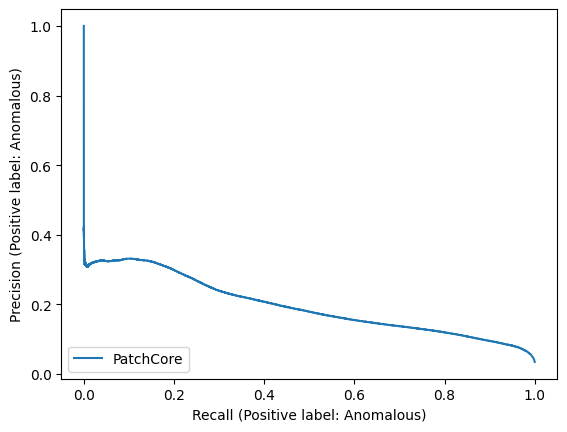

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import os
%matplotlib inline

display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name="PatchCore",pos_label="Anomalous")
display.plot()
plt.show()
plt.close()

Check metrics

In [39]:
import pickle
# anomaly_segmentations,ground_truth_masks,negative_masks, test_metrics,metrics

with open("/content/drive/Othercomputers/My laptop/patchcore-medical/" + "evaluated_results/anomaly_test/flipped_pixelwise_metrics/BEST_IM224_WR50_L2-3_P1_D1024-1024_PS-3_AN-1_S0_0_0/new-pixelwise-metrics.pkl", 'rb') as file:
  anomaly_segmentations,ground_truth_masks,negative_masks, test_metrics, metrics_all = pickle.load(file)

In [40]:
test_metrics.keys()

dict_keys(['TP', 'FP', 'Precision', 'Recall', 'F1'])

In [42]:
len(metrics_all["Precision"])

1

In [47]:
metrics_all.keys()

dict_keys(['TP', 'FP', 'Precision', 'Recall', 'F1'])

In [53]:
metrics_all

{'TP': [[1, 1, 1, 1, 1]],
 'FP': [[17, 17, 35, 13, 27]],
 'Precision': [[0.05555555555555555,
   0.05555555555555555,
   0.027777777777777776,
   0.07142857142857142,
   0.03571428571428571]],
 'Recall': [[1, 1, 1, 1, 1]],
 'F1': [[0.10526315689750693,
   0.10526315689750693,
   0.05405405352812273,
   0.1333333320888889,
   0.06896551657550536]]}

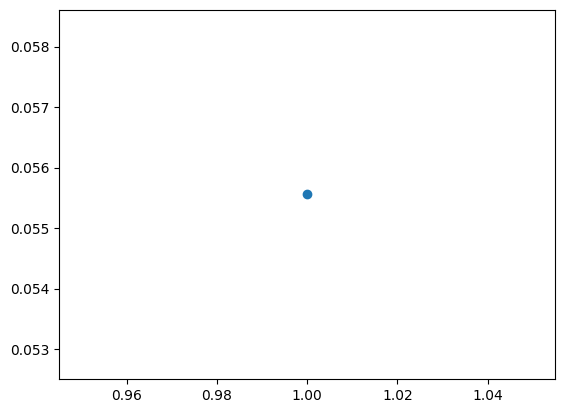

In [56]:
# Create precision/recall curve
from sklearn import metrics
import matplotlib.pyplot as plt

precision = test_metrics["Precision"][0]
recall = test_metrics["Recall"][0]
plt.plot(recall, precision, marker='o', linestyle='-')
# display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall, estimator_name="PatchCore", pos_label="Anomalous")
# display.plot()
plt.show()
plt.close()

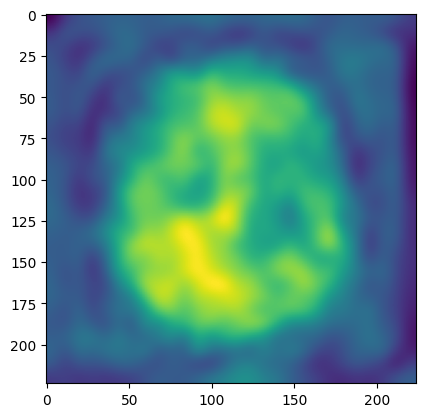

In [58]:
plt.imshow(anomaly_segmentations[4])

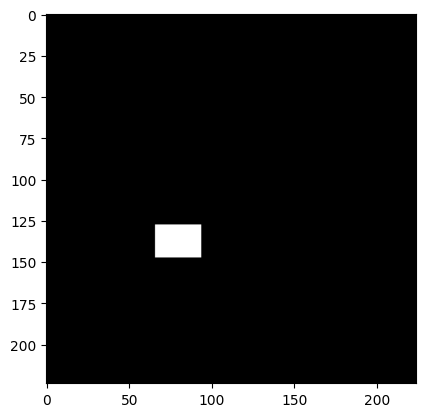

In [59]:
plt.imshow(np.squeeze(ground_truth_masks[4]),cmap="gray")